In [1]:
import matplotlib.pyplot as plt 
import numpy as np 

In [105]:
def legendre_symbol(a, p):
    """
    Calculate the Legendre symbol (a|p).

    Args:
        a: An integer.
        p: An odd prime number.

    Returns:
        0 if a is divisible by p.
        1 if a is a quadratic residue modulo p.
        -1 if a is a quadratic non-residue modulo p.
    """
    # a %= p
    # if a == 0:
    #     return 0
    # if a == 1:
    #     return 1

    # if a % 2 == 0:
    #     return legendre_symbol(a // 2, p) * (-1)**((p**2 - 1) // 8)
    # else:
    #     return legendre_symbol(p % a, a) * (-1)**((a - 1) * (p - 1) // 4)
    return pow(a, (p - 1) // 2, p)

def tonelli(n, p): 
  q = p - 1
  s = 0 
  while q % 2 == 0: 
    q //= 2 
    s += 1 
  if s == 1: 
    return pow(n, (p+1) // 4, p)
  for z in range(2, p): 
    if p-1 == legendre_symbol(z, p): 
      break 
  c = pow(z, q, p) 
  r = pow(n, (q+1) // 2, p) 
  t = pow(n, q, p)
  m = s 
  t2 = 0 

  while (t-1) % p != 0: 
    t2 = (t*t) % p 
    for i in range(1, m): 
      if (t2 - 1) % p == 0: 
        break 
      t2 = (t2 * t2) % p 
    b = pow(c, 1 << (m - i - 1), p)
    r = (r * b) % p 
    c = (b * b) % p 
    t = (t * c) % p 
    m = i 
  return r 

In [ ]:
# y^2 = x^3 + a*x + b mod p 

a = 0
b = 3
p = 23

x = np.arange(p)

In [144]:
def quadratic_residues(p): 
  y = list() 
  for i in range(p): 
    y.append(i**2 % p)
  return set(y)

In [ ]:
print(-16 * (4 * a**3 + 27 * b**2))
# x**3 + a*x + b
# y_sq = (np.power(x, 3)%p + (a*x)%p + b%p) % p

coords = list()
qr = quadratic_residues(p)
print(qr)
for i in range(p): 
  out = (i**3 + a*i + b) % p
  if out in qr: 
    # print(i, out)
    sq_root = tonelli(out, p)
    coords.append([i, sq_root])
    coords.append([i, p - sq_root])

  # quadratic residue check 
  # l_s = legendre_symbol(out, p)
  # 3 ** (5-1)//2
  # print(i, out, l_s)
  # if l_s == 1: 
  #   # identifying square roots. 
  #   sq_root = tonelli(l_s, p)
  #   # sq_root = tonellishanks(l_s, p)
  #   coords.append([i, sq_root])
  #   coords.append([i, p - sq_root])

# y = np.sqrt(x**3 - x) % p

# plt.scatter(x, y)

-3888
{0, 1, 2, 3, 4, 6, 8, 9, 12, 13, 16, 18}


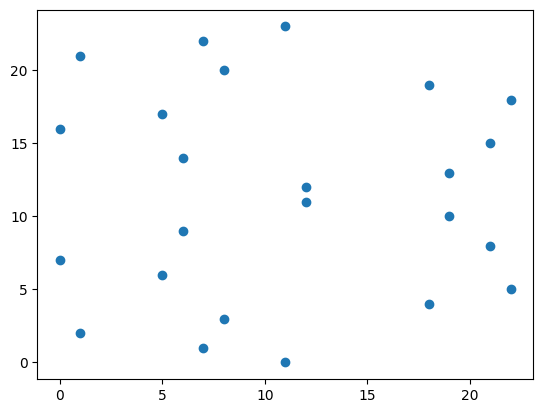

In [146]:
plt.scatter(np.asarray(coords)[:, 0], np.asarray(coords)[:, 1])

In [88]:
from tonellishanks import tonellishanks

In [95]:
tonellishanks(l_s, p)

1

In [ ]:
def tonelli(n, p):
    assert legendre_symbol(n, p) == 1, "not a square (mod p)"
    q = p - 1
    s = 0
    while q % 2 == 0:
        q //= 2
        s += 1
    if s == 1:
        return pow(n, (p + 1) // 4, p)
    for z in range(2, p):
        if p - 1 == legendre_symbol(z, p):
            break
    c = pow(z, q, p)
    r = pow(n, (q + 1) // 2, p)
    t = pow(n, q, p)
    m = s
    t2 = 0
    while (t - 1) % p != 0:
        t2 = (t * t) % p
        for i in range(1, m):
            if (t2 - 1) % p == 0:
                break
            t2 = (t2 * t2) % p
        b = pow(c, 1 << (m - i - 1), p)
        r = (r * b) % p
        c = (b * b) % p
        t = (t * c) % p
        m = i
    return r

if __name__ == '__main__':
    ttest = [(10, 13), (56, 101), (1030, 10009), (44402, 100049),
	     (665820697, 1000000009), (881398088036, 1000000000039),
             (41660815127637347468140745042827704103445750172002, 10**50 + 577)]
    for n, p in ttest:
        r = tonelli(n, p)
        assert (r * r - n) % p == 0
        print("n = %d p = %d" % (n, p))
        print("\t  roots : %d %d" % (r, p - r))

ValueError: negative shift count

In [83]:
tonelli(10, 13)

ValueError: negative shift count

In [82]:
coords

[[0, 1],
 [0, 22],
 [1, 1],
 [1, 22],
 [5, 1],
 [5, 22],
 [6, 1],
 [6, 22],
 [7, 1],
 [7, 22],
 [8, 1],
 [8, 22],
 [12, 1],
 [12, 22],
 [18, 1],
 [18, 22],
 [19, 1],
 [19, 22],
 [21, 1],
 [21, 22],
 [22, 1],
 [22, 22]]

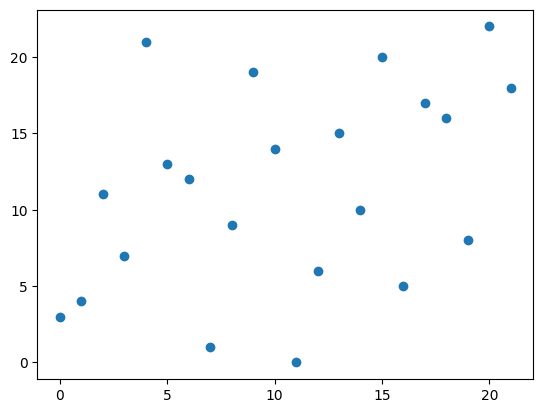